In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from imagen2 import Imagen

[[ 400.  400.]
 [1000.  400.]
 [ 400.  978.]
 [1000.  978.]]


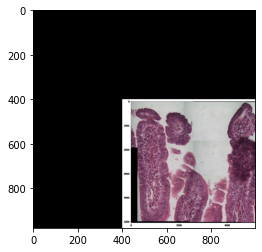

In [2]:
imagen = Imagen(cv2.imread('ejemplos/intestino3x4.png'), cv2.xfeatures2d.SURF_create())

H = np.eye(3)
H[0][2] = 400
H[1][2] = 400

roi = imagen.transformar(H, shape=( 1000, 1000))
plt.imshow(imagen.imagen[...,::-1])

print(roi)


In [9]:
imagen.keypoints[0]

array([863.4732 , 965.42505], dtype=float32)

In [2]:
imagen = cv2.imread('ejemplos/intestino3x4.png')

panorama = np.memmap('prueba.nparr', dtype=np.uint8, mode='w+', shape=imagen.shape)
panorama[:] = imagen[:]

In [ ]:
imagen.shape

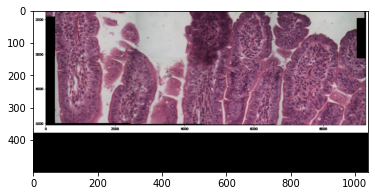

In [3]:
subpano = np.memmap('prueba.nparr', dtype=np.uint8, mode='r+', offset=200 * imagen.shape[1] * 3, shape=( 500, imagen.shape[1], 3) )
plt.imshow(subpano[...,::-1])

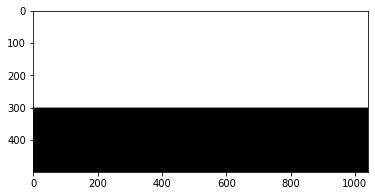

In [7]:
mask = np.vstack( [ np.ones( (300, imagen.shape[1]), dtype=np.uint8) * 255, np.zeros( (200, imagen.shape[1]), dtype=np.uint8) ]).astype(np.uint8)
plt.imshow(mask, cmap='gray')


(500, 1041) (500, 1041, 3)


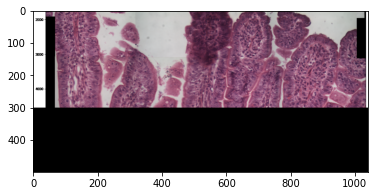

In [8]:
print( mask.shape, subpano.shape)

subpano = cv2.bitwise_and( subpano, subpano, mask=mask)
plt.imshow(subpano[...,::-1])